In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
tetrahedron_points = [np.array([0., 0., 0.]),
                      np.array([1., 0., 0.]),
                      np.array([np.cos(np.pi/3), np.sin(np.pi/3), 0.]),
                      np.array([0.5, 0.5/np.sqrt(3), np.sqrt(2./3.)])]

sampled_points = np.concatenate([np.random.multivariate_normal(point, np.eye(3)*0.0001, 10)
                                 for point in tetrahedron_points])

init_points = np.concatenate([np.random.multivariate_normal(point[:2], np.eye(2)*0.0001, 10)
                              for point in tetrahedron_points])

In [3]:
N = sampled_points.shape[0]
d = sampled_points.shape[1]

In [4]:
X = tf.placeholder('float')
Xshape = tf.shape(X)

sqX = tf.reduce_sum(X*X, 1)
sqX = tf.reshape(sqX, [-1, 1])
sqDX = sqX - 2*tf.matmul(X, tf.transpose(X)) + tf.transpose(sqX)
DX = tf.sqrt(sqDX)

Y = tf.Variable(init_points, dtype='float')
sqY = tf.reduce_sum(Y*Y, 1)
sqY = tf.reshape(sqY, [-1, 1])
sqDY = sqY - 2*tf.matmul(Y, tf.transpose(Y)) + tf.transpose(sqY)
DY = tf.sqrt(sqDY)

In [5]:
Z = tf.reduce_sum(DX)*0.5
numerator = tf.reduce_sum(tf.divide(tf.square(DX-DY), DX+tf.diag(tf.ones(N))))*0.5
cost = numerator / Z

In [41]:
optimizer = tf.train.RMSPropOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()

In [34]:
sess = tf.Session()

In [42]:
sess.run(init)

In [38]:
sess.run(DX, feed_dict={X: sampled_points})

array([[ 0.        ,  0.0119949 ,  0.01422764, ...,  1.00021553,
         0.99019378,  0.98069006],
       [ 0.0119949 ,  0.        ,  0.01512961, ...,  1.00334811,
         0.99342656,  0.98402798],
       [ 0.01422764,  0.01512961,  0.        , ...,  0.99277872,
         0.98275334,  0.97332674],
       ..., 
       [ 1.00021553,  1.00334811,  0.99277872, ...,  0.        ,
         0.01478211,  0.02680437],
       [ 0.99019378,  0.99342656,  0.98275334, ...,  0.01478211,
         0.        ,  0.01308831],
       [ 0.98069006,  0.98402798,  0.97332674, ...,  0.02680437,
         0.01308831,  0.        ]], dtype=float32)

In [39]:
sess.run(Y, feed_dict={X: sampled_points})

array([[  1.07119698e-02,   1.05829036e-03],
       [  7.98540283e-03,   1.11537566e-03],
       [ -5.07155061e-03,  -5.38939517e-03],
       [  1.89157557e-02,  -1.92610838e-03],
       [  4.09266027e-03,   1.34123452e-02],
       [  1.21662244e-02,  -7.96879875e-04],
       [ -8.19060020e-03,  -1.39483605e-02],
       [ -7.60519551e-03,  -4.31561982e-03],
       [  6.63260743e-03,   4.52301651e-03],
       [  1.45374304e-02,  -8.14179983e-03],
       [  1.00109375e+00,   1.77389923e-02],
       [  1.01258028e+00,   3.29032773e-04],
       [  9.96693134e-01,   1.47395981e-02],
       [  9.99416590e-01,  -3.51690780e-03],
       [  9.99738753e-01,  -3.61185870e-03],
       [  1.00923622e+00,  -2.53421837e-03],
       [  1.00931656e+00,  -8.97154491e-03],
       [  1.00308776e+00,   7.79502233e-03],
       [  9.95498955e-01,   4.22325451e-03],
       [  1.00351036e+00,   1.13591540e-03],
       [  5.09002149e-01,   8.54496479e-01],
       [  5.07815719e-01,   8.70284855e-01],
       [  

In [43]:
nbsteps = 1000
c = sess.run(cost, feed_dict={X: sampled_points})
print "epoch: ", -1, " cost = ", c
for i in range(nbsteps):
    sess.run(optimizer, feed_dict={X: sampled_points})
    c = sess.run(cost, feed_dict={X: sampled_points})
    print "epoch: ", i, " cost = ", c

epoch:  -1  cost =  0.0918874
epoch:  0  cost =  nan
epoch:  1  cost =  nan
epoch:  2  cost =  nan
epoch:  3  cost =  nan
epoch:  4  cost =  nan
epoch:  5  cost =  nan
epoch:  6  cost =  nan
epoch:  7  cost =  nan
epoch:  8  cost =  nan
epoch:  9  cost =  nan
epoch:  10  cost =  nan
epoch:  11  cost =  nan
epoch:  12  cost =  nan
epoch:  13  cost =  nan
epoch:  14  cost =  nan
epoch:  15  cost =  nan
epoch:  16  cost =  nan
epoch:  17  cost =  nan
epoch:  18  cost =  nan
epoch:  19  cost =  nan
epoch:  20  cost =  nan
epoch:  21  cost =  nan
epoch:  22  cost =  nan
epoch:  23  cost =  nan
epoch:  24  cost =  nan
epoch:  25  cost =  nan
epoch:  26  cost =  nan
epoch:  27  cost =  nan
epoch:  28  cost =  nan
epoch:  29  cost =  nan
epoch:  30  cost =  nan
epoch:  31  cost =  nan
epoch:  32  cost =  nan
epoch:  33  cost =  nan
epoch:  34  cost =  nan
epoch:  35  cost =  nan
epoch:  36  cost =  nan
epoch:  37  cost =  nan
epoch:  38  cost =  nan
epoch:  39  cost =  nan
epoch:  40  cost =  

In [29]:
sess.run(tf.divide(tf.square(DX-DY), DX+tf.diag(tf.ones(N))), feed_dict={X: sampled_points})

array([[ 0.        ,  0.0119949 ,  0.01422764, ...,  1.00021553,
         0.99019378,  0.98069006],
       [ 0.0119949 ,  0.        ,  0.01512961, ...,  1.00334811,
         0.99342656,  0.98402798],
       [ 0.01422764,  0.01512961,  0.        , ...,  0.99277872,
         0.98275334,  0.97332674],
       ..., 
       [ 1.00021553,  1.00334811,  0.99277872, ...,  0.        ,
         0.01478211,  0.02680437],
       [ 0.99019378,  0.99342656,  0.98275334, ...,  0.01478211,
         0.        ,  0.01308831],
       [ 0.98069006,  0.98402798,  0.97332674, ...,  0.02680437,
         0.01308831,  0.        ]], dtype=float32)

In [30]:
calculated_Y = sess.run(Y, feed_dict={X: sampled_points})

In [31]:
sess.close()

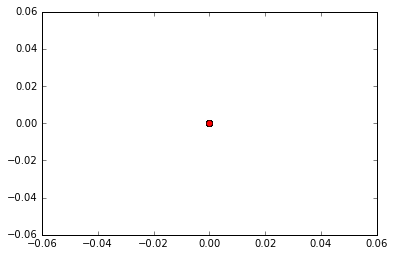

In [32]:
embed1, embed2 = calculated_Y.transpose()
plt.plot(embed1, embed2, 'ro')

In [33]:
calculated_Y

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]], dtype=float32)